In [1]:
import pandas as pd

In [16]:
#First import the data 
data=pd.read_excel(r"C:\Users\Sarah\Downloads\Task4_data.xlsx")

In [4]:
# Calculate the number (sum) of missing data (isna), result => missing data only on income 
mv=data.isna().sum()
mv

Year_Birth          0
Education           0
Marital_Status      0
Income             17
Kidhome             0
Recency             0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
Response            0
dtype: int64

In [8]:
#see all info such as count, mead, std, min, max and quartiles
# outlier for example min Birth Year = 1893 !
# same person doesn't buy anything, not interesting for our database 
stat=data.describe()
stat

,Year_Birth,Income,Kidhome,Recency,MntFruits,MntMeatProducts,MntFishProducts,Response
count,1882.000000,1865.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000
mean,1968.871413,51976.252547,0.450053,49.287460,26.009564,167.457492,37.291180,0.148247
std,12.002899,21423.366164,0.542605,29.031702,39.467116,225.219103,54.618986,0.355439
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,35684.000000,0.000000,24.000000,1.000000,16.000000,3.000000,0.000000
50%,1970.000000,51315.000000,0.000000,50.000000,8.000000,68.000000,12.000000,0.000000
75%,1977.000000,68397.000000,1.000000,74.000000,32.000000,237.250000,49.000000,0.000000
max,1996.000000,162397.000000,2.000000,99.000000,199.000000,1725.000000,259.000000,1.000000


In [10]:
#Correlation Matrix 
# linear relationship , between -1(negative correlation) and 1 (positive correlation)
#income / meat is positive : so if person is rich (+), the will buy meat (+) so correlation close to 1
cor=data.corr()
cor

,Year_Birth,Income,Kidhome,Recency,MntFruits,MntMeatProducts,MntFishProducts,Response
Year_Birth,1.000000,-0.194099,0.231164,-0.035347,-0.014847,-0.029177,-0.041099,0.025904
Income,-0.194099,1.000000,-0.515570,-0.013281,0.509222,0.697365,0.523081,0.143371
Kidhome,0.231164,-0.515570,1.000000,-0.001906,-0.377394,-0.442222,-0.387391,-0.070470
Recency,-0.035347,-0.013281,-0.001906,1.000000,-0.021165,0.010986,-0.002037,-0.205883
MntFruits,-0.014847,0.509222,-0.377394,-0.021165,1.000000,0.547056,0.572277,0.122497
MntMeatProducts,-0.029177,0.697365,-0.442222,0.010986,0.547056,1.000000,0.565539,0.222513
MntFishProducts,-0.041099,0.523081,-0.387391,-0.002037,0.572277,0.565539,1.000000,0.105451
Response,0.025904,0.143371,-0.070470,-0.205883,0.122497,0.222513,0.105451,1.000000


In [17]:
# Encode caterogiral data: 
#First import Label Encoder
# Assign encoder to LabecEncoder
# categorical data such as Education and Marital Status are now encoded and can be taken in account for the analysis 

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Education_encode']=encoder.fit_transform(data['Education'])
data['Marital_Status_encode']=encoder.fit_transform(data['Marital_Status'])
data=data.drop(columns=['Education', 'Marital_Status'])
data

,Year_Birth,Income,Kidhome,Recency,MntFruits,MntMeatProducts,MntFishProducts,Response,Education_encode,Marital_Status_encode
0,1957,58138.0,0,58,88,546,172,1,2,3
1,1954,46344.0,1,38,1,6,2,0,2,3
2,1965,71613.0,0,26,49,127,111,0,2,4
3,1984,26646.0,1,26,4,20,10,0,2,4
4,1981,58293.0,1,94,43,118,46,0,4,2
...,...,...,...,...,...,...,...,...,...,...
1877,1958,72905.0,0,52,114,445,181,0,2,2
1878,1951,69702.0,0,8,9,240,50,0,4,4
1879,1975,70300.0,1,89,61,338,60,0,2,1
1880,1984,70643.0,0,66,107,304,23,1,4,2


In [19]:
# replace missing values by 0. replacing by 0 is not always the right thing to do, really depends on the data
#Sometimes missing data is also data. 
#Eg: countries that produce missiles. 0 can mean they do not produce, it can also mean they did not give the info 
import numpy as np
data=data.replace(np.nan,0)
## DATA PREP IS FINISHED

In [21]:
#Divide the dataset into independent and dependent variables
#Take the dataset with independant variables. I want to indicate to python what are the informations I want to consider. 
# We say all columns influence the "Response" column

#split dataset in features and target variable
data.columns
feature_cols = ['Year_Birth', 'Income', 'Kidhome', 'Recency', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts',  'Education_encode',
       'Marital_Status_encode']
features=data[feature_cols]
target=data["Response"]

In [22]:
#Divide the datasets into train and test
# Split dataset into training set and test set
# Import train_test_split function

#Do the model in the train part, then apply the model to the test part. if model work for both it is good, if not it has the be reseen
# input an xtest in model, get ytest, check if ytest is close to y real, if yes then model seems to work 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1) # 70% training and 30% test
#Usually we have more data in train and less data in test part . here 70% will go to train and 30% to test 
# 4 data sets : Target and feature, each divided in test and train 

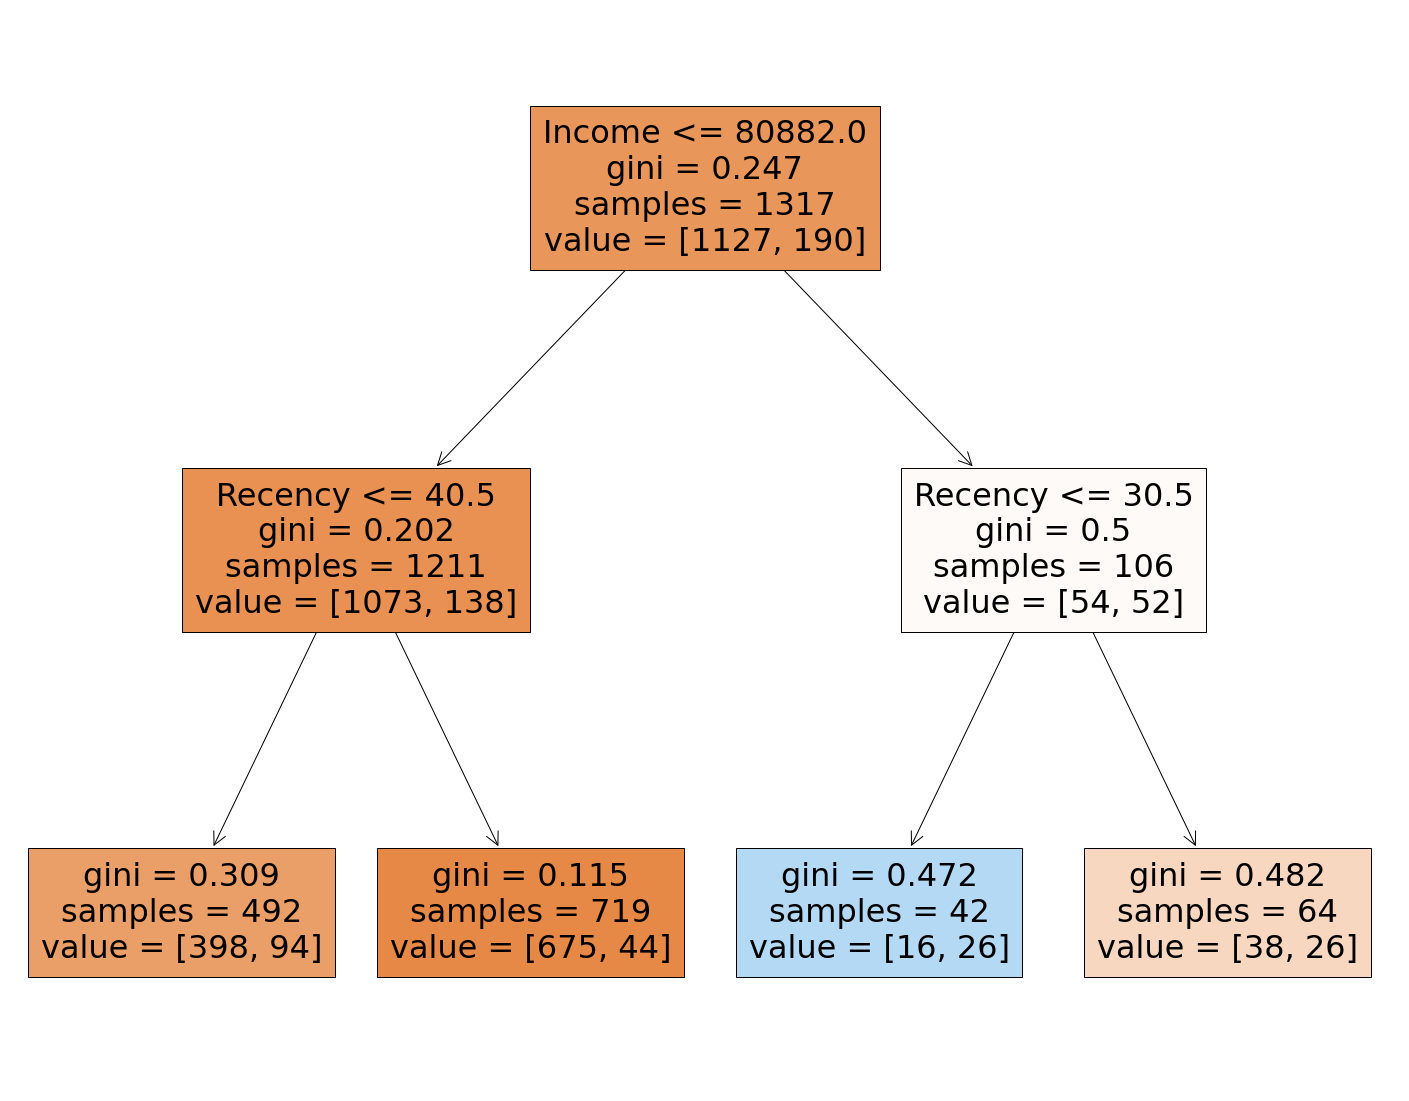

In [26]:
#Implement the Decision Tree/Random Forest Model with different parameters (up to 5 variants)
#import the method from the library
#I import two sublibraries for decisionTrees
# clf (classifier) quals to my model (DecisionTree)
#implement the model to my train part 

from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
clf0 = DecisionTreeClassifier(max_depth=2) #add max_depth=2 to change depth 
model = clf0.fit(x_train, y_train)
text_representation = tree.export_text(clf0)

import matplotlib.pyplot as plt #library for visualisation 
fig = plt.figure(figsize=(25,20)) #see the tree and determine figure size
_ = tree.plot_tree(clf0, 
                   feature_names=feature_cols,  
    
                   filled=True)
fig.savefig("decistion_tree.png")

from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier()
clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y1_pred=clf1.predict(x_test)
y2_pred=clf2.predict(x_test)
